# Imports and Setup

In [1]:
%pylab inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16.0, 4.0]
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import podpac
import podpac.core.data.type
import podpac.core.utils

# Setup PODPAC Nodes

In [3]:
kwargs = dict(source=podpac.core.utils.load_setting('WCSServerUrl'), interpolation='nearest')

# Elevation Layers
srtm = podpac.core.data.type.WCS(layer_name="dassp.main_map.topography.elevation.ElevationNASASRTM30m", **kwargs)
usgs = podpac.core.data.type.WCS(layer_name="dassp.main_map.topography.elevation.ElevationUSGSNED30m", **kwargs)

# TWI Layers
srtm_twi = podpac.core.data.type.WCS(layer_name="dassp.main_map.topography.elevation.TopographicWetnessIndexNASASRTM30m", **kwargs)
srtm_twi_star = podpac.core.data.type.WCS(layer_name="dassp.main_map.topography.elevation.TWItestdatacomposited", **kwargs)
usgs_twi = podpac.core.data.type.WCS(layer_name="dassp.main_map.topography.elevation.TopographicWetnessIndexUSGSNED30m", **kwargs)

# Create PODPAC Coordinates

In [4]:
# Create coordinates for comparison
coordinates = podpac.Coordinate(lat=(43.7, 43.65, 256),
                                lon=(-72.25, -72.2, 256))
coordinates

Coordinate
	lat: UniformCoord: Bounds[43.65, 43.7], N[256], ctype["segment"]
	lon: UniformCoord: Bounds[-72.25, -72.2], N[256], ctype["segment"]

# Evaluate and Plot Elevation Nodes

Text(0.5,1,'SRTM-USGS Elevation')

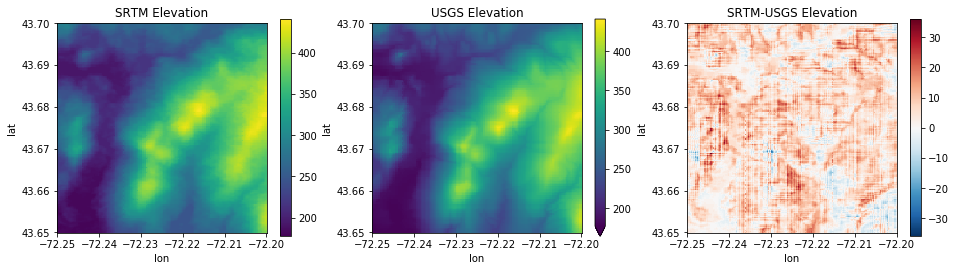

In [5]:
srtm_o = srtm.execute(coordinates)
usgs_o = usgs.execute(coordinates)

subplot(131); srtm_o.plot(vmin=srtm_o.min(), vmax=srtm_o.max()); axis('scaled'); title('SRTM Elevation')
subplot(132); usgs_o.plot(vmin=srtm_o.min(), vmax=srtm_o.max()); axis('scaled'); title('USGS Elevation')
subplot(133); (srtm_o - usgs_o).plot(); axis('scaled');  title('SRTM-USGS Elevation')

# Evaluate and Plot TWI Nodes

In [6]:
# Retrieve TWI Layers
srtm_twi_o = srtm_twi.execute(coordinates)
srtm_twi_star_o = srtm_twi_star.execute(coordinates)
usgs_twi_o = usgs_twi.execute(coordinates)

Text(0.5,1,'SRTM - SRTM* TWI')

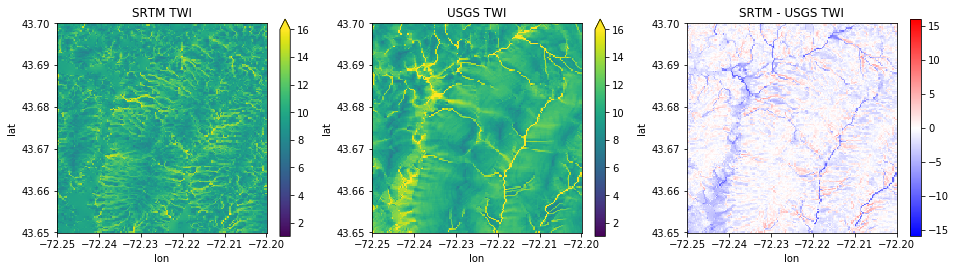

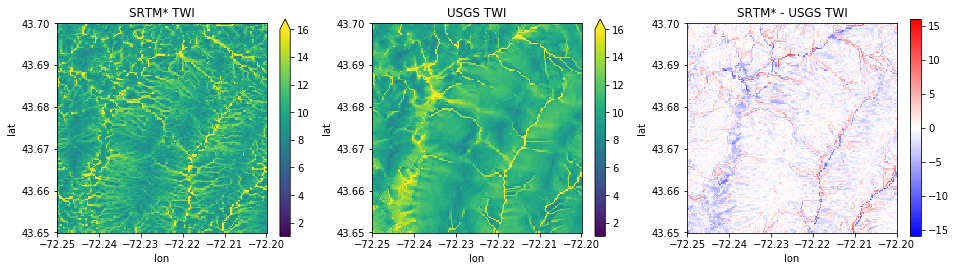

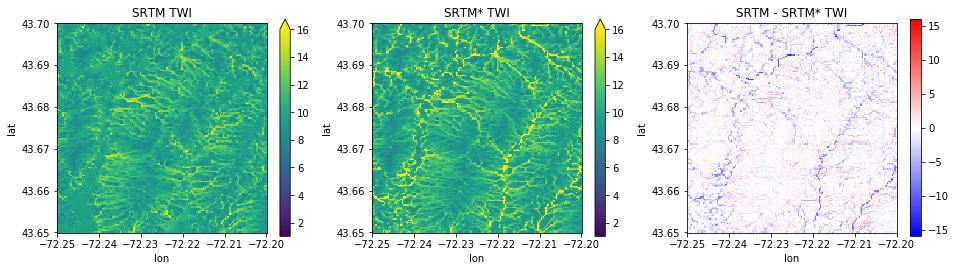

In [7]:
# Plot TWI
figure()
subplot(131); srtm_twi_o.plot(vmin=1, vmax=16); axis('scaled'); title('SRTM TWI')
subplot(132); usgs_twi_o.plot(vmin=1, vmax=16); axis('scaled'); title('USGS TWI')
subplot(133); (srtm_twi_o - usgs_twi_o).plot(vmin=-16, vmax=16, cmap='bwr'); axis('scaled'); title('SRTM - USGS TWI')

figure()
subplot(131); srtm_twi_star_o.plot(vmin=1, vmax=16); axis('scaled'); title('SRTM* TWI')
subplot(132); usgs_twi_o.plot(vmin=1, vmax=16); axis('scaled'); title('USGS TWI')
subplot(133); (srtm_twi_star_o - usgs_twi_o).plot(vmin=-16, vmax=16, cmap='bwr'); axis('scaled'); title('SRTM* - USGS TWI')

figure()
subplot(131); srtm_twi_o.plot(vmin=1, vmax=16); axis('scaled'); title('SRTM TWI')
subplot(132); srtm_twi_star_o.plot(vmin=1, vmax=16); axis('scaled'); title('SRTM* TWI')
subplot(133); (srtm_twi_o - srtm_twi_star_o).plot(vmin=-16, vmax=16, cmap='bwr'); axis('scaled'); title('SRTM - SRTM* TWI')

# Setup Pipeline to Calculate Normalized Difference

(-72.250098039215686,
 -72.199901960784317,
 43.649901960784312,
 43.700098039215689)

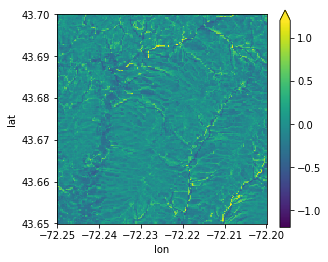

In [8]:
# Calculate normalized difference
norm_diff = podpac.Arithmetic(A=srtm_twi_star, B=usgs_twi, eqn='(A - B) / B')
norm_diff_o = norm_diff.execute(coordinates, params={'eqn': norm_diff.eqn})
subplot(131)
norm_diff_o.plot(cmap='viridis', vmin=-1.2, vmax=1.2); axis('scaled')

In [9]:
print(norm_diff.pipeline_json)

{
    "nodes": {
        "TWItestdatacomposited": {
            "node": "core.data.type.WCS",
            "source": WCS_SERVER_URL,
            "attrs": {
                "interpolation": "nearest",
                "layer_name": "dassp.main_map.topography.elevation.TWItestdatacomposited"
            }
        },
        "TopographicWetnessIndexUSGSNED30m": {
            "node": "core.data.type.WCS",
            "source": WCS_SERVER_URL,
            "attrs": {
                "interpolation": "nearest",
                "layer_name": "dassp.main_map.topography.elevation.TopographicWetnessIndexUSGSNED30m"
            }
        },
        "Arithmetic": {
            "node": "core.algorithm.algorithm.Arithmetic",
            "inputs": {
                "A": "TWItestdatacomposited",
                "B": "TopographicWetnessIndexUSGSNED30m"
            },
            "params": {
                "eqn": "(A - B) / B"
            }
        }
    },
    "outputs": [
        {
            "mode": "